In [1]:
#!pip install xlrd
#!pip install openpyxl
#!pip install pandas
import numpy as np
import os
import zipfile
import pandas as pd
import shutil
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
image_root = './Images/240905_all_images/'
images = os.listdir(image_root)
print(len(images))

1


## Gif to png

In [3]:
def convert_gif_to_png(gif_path, output_path):
    # GIF 파일 열기
    with Image.open(gif_path) as im:
        # GIF 파일의 모든 프레임을 순회
        for frame in range(im.n_frames):
            # 프레임 선택
            im.seek(frame)
            # PNG 파일로 저장
            im.save(output_path)
            print(f"Saved {output_path}")
for image in images:
    if image[-3:] == 'gif':
        old_image_path = os.path.join(image_root, image)
        new_image_path = os.path.join(image_root, image.replace(image[-3:], 'png'))
        gif_bk_path    = os.path.join('./Images/GIF_bk', image)
        
        try : 
            convert_gif_to_png(old_image_path, new_image_path)
            shutil.move(old_image_path, gif_bk_path)
            print(gif_bk_path)
        except : 
            os.rename(old_image_path, new_image_path)

## Label distribution checker

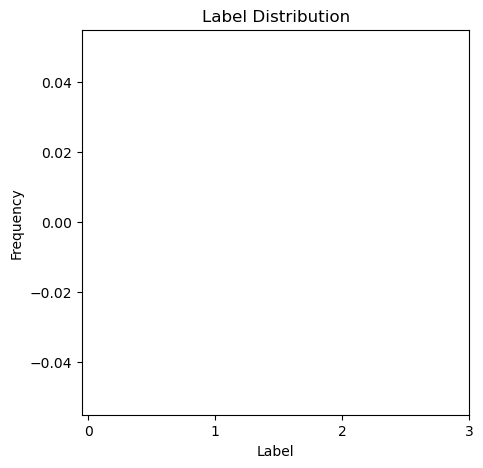

In [4]:
labels = []
for image in images:
    if image[0] != '.' : 
        if image[-3:] != 'png':
            old_image_path = os.path.join(image_root, image)
            if image.split('.')[-1] == 'jpeg': new_image_path = os.path.join(image_root, image.replace('jpeg', 'png'))
            else: new_image_path = os.path.join(image_root, image.replace(image[-3:], 'png'))
            print(old_image_path, new_image_path)
            os.rename(old_image_path, new_image_path)
        
        pt_no, age, label = image.split(' ')
        label = label.split('.')[0]
        labels.append(int(label))
        
plt.figure(figsize = (5,5))
plt.title('Label Distribution')
plt.hist(labels)
plt.xticks([0,1,2,3])
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()   

## Processed label distribution checker

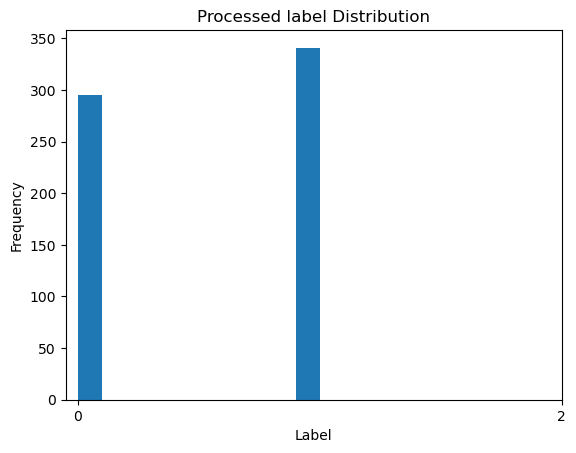

In [147]:
processed_labels = []

for label in labels:
    if label in [0,1]:
        processed_label = 0
    elif label in [2,3]:
        processed_label = 1
    
    processed_labels.append(processed_label)
    
plt.title('Processed label Distribution')
plt.hist(processed_labels)
plt.xticks([0,2])
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()    

In [153]:
n_0 = (np.array(processed_labels) == 0).sum()
n_1 = (np.array(processed_labels) == 1).sum()
total = n_0 + n_1
print('total : ', total, ', n_0 :', n_0, ', n_1 :', n_1)

print(f'Processed label ratio  0 : 1 ///  {n_0/total:.2f} : {n_1/total:.2f} ')

total :  636 , n_0 : 295 , n_1 : 341
Processed label ratio  0 : 1 ///  0.46 : 0.54 


In [152]:
train_n = int(total *0.6)
val_n   = int(total *0.2)
test_n  = total - train_n - val_n

print(train_n, val_n, test_n)

381 127 128


In [154]:
#"""
n_data = {}
n_data['Train']  = 381
n_data['Validation']  = 127
n_data['Test']  = 128

for stage in n_data.keys():
    print(stage)
    n_0 = int(n_data[stage] * 0.46)
    n_1 = n_data[stage] - n_0
    image_root = './Images/240905_all_images/'
    images = os.listdir(image_root)
    stage_root = os.path.join('./Images', stage)
    
    image_0, image_1 = [], []
    
    for image in images:
        if image [-3:] != 'png' : continue
        pt_no, age, label = image.split(' ')
        label = label.split('.png')[0][0]
        label = int(label)
        if label in [0,1]    : image_0.append(image)
        elif label in [2,3]  : image_1.append(image)
        
    for image in image_0[:n_0]:    
        from_path = os.path.join(image_root, image)
        to_path   = os.path.join(stage_root, image)
        shutil.move(from_path, to_path)
        #print(from_path ,to_path)
        
    for image in image_1[:n_1]:    
        from_path = os.path.join(image_root, image)
        to_path   = os.path.join(stage_root, image)
        shutil.move(from_path, to_path)
        #print(from_path ,to_path)
#"""

Train
Validation
Test


In [159]:
#"""
#transferring organized_images to train_data
train_path = os.path.join('./Images', 'Train')
val_path = os.path.join('./Images', 'Validation')
test_path = os.path.join('./Images', 'Test')


train_images = os.listdir(train_path)
val_images = os.listdir(val_path)
test_images = os.listdir(test_path)


print(len(train_images), len(val_images), len(test_images))
# train에 checkpoints 이씅니 그거는 제외하고 생각하면 61갱미..
#"""

381 128 128


In [160]:
for image in train_images:
    if image[-3:] != 'png':
        print(image)